In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
sns.set()

In [5]:
def new_z(contigs):
    mean = contigs.mean(axis=0)
    fractions = mean/mean.sum()
    E = (contigs.sum(axis=1) * np.ones(contigs.shape).T).T * fractions
    alt_z = (contigs - E)/np.sqrt(E)
    return alt_z


In [249]:
counts = pd.read_csv("./pca1_tnf.csv")
labels = counts['genome']
labels = labels.values
counts = counts.drop('genome',axis=1)
c = counts.values
X = new_z(c)

In [250]:
pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

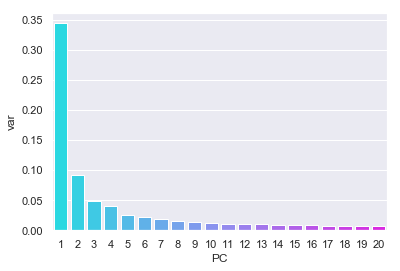

In [251]:
#Scree plot
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 
                   'PC':[x+1 for x in range(len(pca.explained_variance_ratio_))]})

sns.barplot(x='PC',y="var", 
           data=df[0:20], palette='cool');

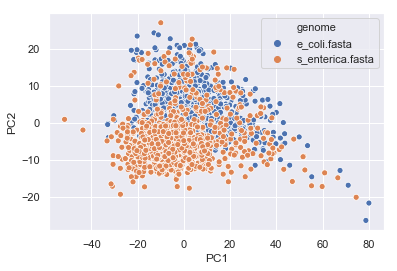

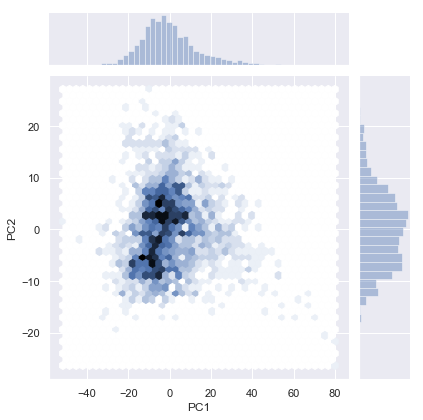

In [252]:
#PCA plot
pca_df = pd.DataFrame(pca_data, 
                      columns=['PC'+ str(x+1) for x in range(len(pca.explained_variance_ratio_))])
pca_df['genome']=labels

sns.scatterplot(x='PC1', y='PC2', hue='genome', data=pca_df)
sns.jointplot(x='PC1', y='PC2', data=pca_df, kind="hex")


## Clustering

In [253]:
clust = OPTICS(min_samples=50, xi=0.001, min_cluster_size=.05)
clust.fit(pca_data[:,:20])

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=50, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.001)

In [254]:
space = np.arange(len(pca_data))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

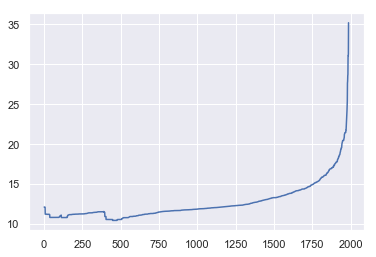

In [255]:
# Reachability plot
plt.plot(space,reachability)

In [256]:
np.sum(labels == -1) 

1238

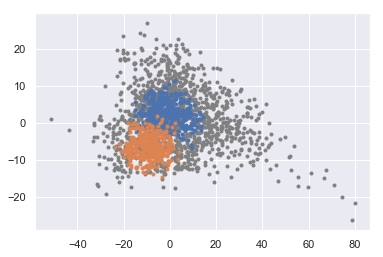

In [257]:
noise = pca_data[clust.labels_ == -1]
X1 = pca_data[clust.labels_ == 0]
X2 = pca_data[clust.labels_ == 1]
plt.plot(noise[:,0], noise[:,1], '.', color='gray')
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.show()

## Contamination level

In [293]:
counts = pd.read_csv("./s_enterica_conts.csv")
counts = counts.loc[counts['contamination'] == 0.4]
counts.head()
labels = counts['contamination']
labels = labels.values
counts = counts.drop('contamination',axis=1)
c = counts.values
X = new_z(c)

In [294]:
pca = PCA()
pca.fit(X)
pca_data = pca.transform(X)

In [295]:
clust = OPTICS(min_samples=50, xi=0.001, min_cluster_size=.05)
clust.fit(pca_data[:,:20])

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=50, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.001)

In [296]:
space = np.arange(len(pca_data))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

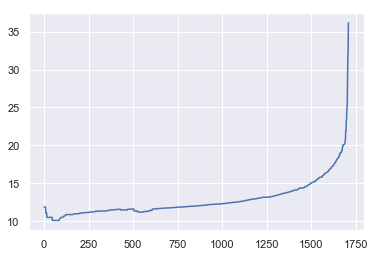

In [297]:
# Reachability plot
plt.plot(space,reachability)

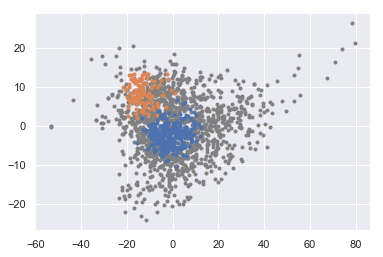

In [298]:
noise = pca_data[clust.labels_ == -1]
X1 = pca_data[clust.labels_ == 0]
X2 = pca_data[clust.labels_ == 1]
plt.plot(noise[:,0], noise[:,1], '.', color='gray')
plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.show()

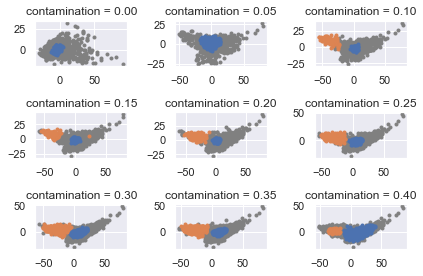

In [314]:
plt.figure()
i=1
for n in [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]:
    counts = pd.read_csv("./s_marcescens_counts.csv")
    counts = counts.loc[counts['contamination'] == n]
    counts.head()
    labels = counts['contamination']
    labels = labels.values
    counts = counts.drop('contamination',axis=1)
    c = counts.values
    X = new_z(c)

    pca = PCA()
    pca.fit(X)
    pca_data = pca.transform(X)
    
    clust = OPTICS(min_samples=50, xi=0.001, min_cluster_size=.05)
    clust.fit(pca_data[:,:20])
    
    space = np.arange(len(pca_data))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]
    
    

    plt.subplot(3,3,i)
    plt.title('contamination = %3.2f' % n)
    noise = pca_data[clust.labels_ == -1]
    X1 = pca_data[clust.labels_ == 0]
    X2 = pca_data[clust.labels_ == 1]
    plt.plot(noise[:,0], noise[:,1], '.', color='gray')
    plt.plot(X1[:,0], X1[:,1], '.')
    plt.plot(X2[:,0], X2[:,1], '.')
    
    i += 1

plt.tight_layout()
plt.show()